### Bank_Personal_Loan_Modelling

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
To know more about the dataset: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling?select=Bank_Personal_Loan_Modelling.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv ('Data/Bank_Personal_Loan_Modelling.csv')

In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
#To check for blank space
if df.isnull().any().any():
    print("There are blank cells in the DataFrame.")
else:
    print("There are no blank cells in the DataFrame.")

There are no blank cells in the DataFrame.


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


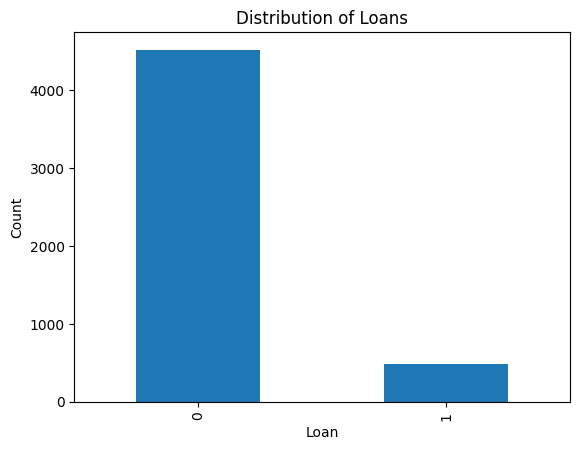

In [6]:
#Plot how many took the loan vs how many did not
df['Personal Loan'].value_counts().plot(kind='bar')
plt.title('Distribution of Loans')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.show()

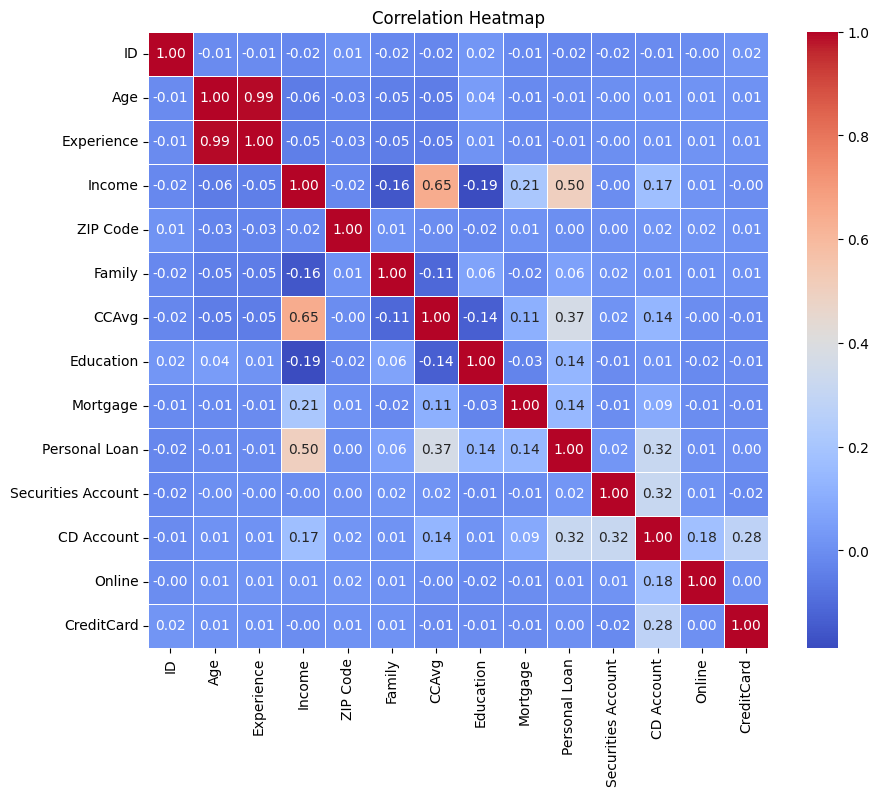

In [7]:
# To view the correlation of each column against each other using heatmap

import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()
 
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
#df['Experience'].value_counts()

### Using Logistic Regression

In [10]:
# Shuffle data
#df = df.sample(frac = 1)

In [11]:
X = df.drop(['ID', 'Personal Loan'], axis = 1)
y = df['Personal Loan']

In [12]:
#Turn the Categeories into numbers
#One Hot Encoding is a process used to turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_features =["Family","Education"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X = transformer.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [13]:
#pd.DataFrame(transformed_x)

In [14]:
#numpy seed

np.random.seed(42)

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

#define model
model_1 = LogisticRegression()

#Fit model
model_1.fit(x_train, y_train)


LogisticRegression()

In [15]:
#Score model
model_1.score(x_test, y_test)

0.9013333333333333

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model_1.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1304,   39],
       [ 109,   48]], dtype=int64)

In [17]:
#To understand the outcome better, let's visualize it pd.crosstab()
import pandas as pd
pd.crosstab(y_test,
           y_pred,
           rownames = ['Actual Label'],
           colnames = ['Predictable Lable'])

Predictable Lable,0,1
Actual Label,,
0,1304,39
1,109,48


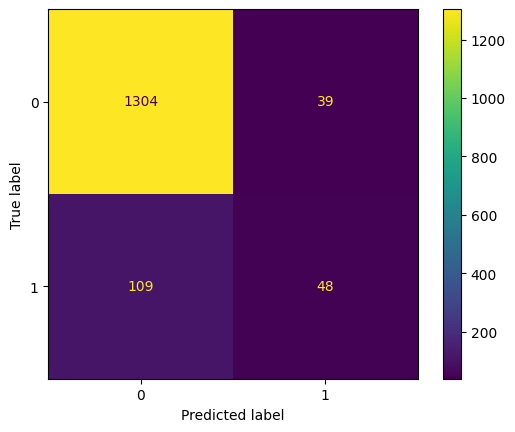

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model_1, X = x_test, y = y_test);

### Using KNN model

In [19]:
#define model
model_2 = KNeighborsClassifier()

#Fit model
model_2.fit(x_train, y_train)

#Score model
# Make predictions on the test set
y_pred = model_2.predict(x_test)

# Score the model on the testing data
accuracy = model_2.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8993333333333333


In [20]:
y_pred = model_2.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1310,   33],
       [ 118,   39]], dtype=int64)

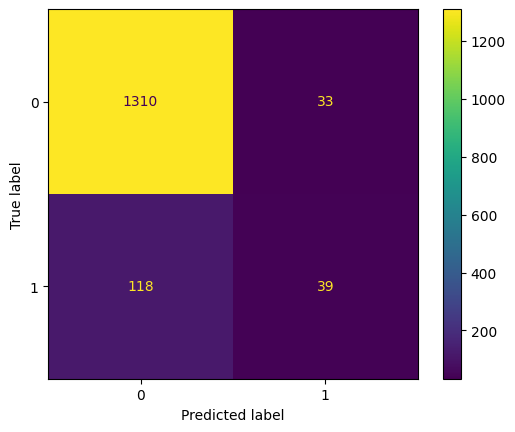

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model_2, X = x_test, y = y_test);

### Using Naive Bayes Model

In [22]:
#define model
model_3 = GaussianNB()

#Fit model
model_3.fit(x_train, y_train)

#Score model
# Make predictions on the test set
y_pred = model_3.predict(x_test)

# Score the model on the testing data
accuracy = model_3.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9046666666666666


In [23]:
y_pred = model_3.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1260,   83],
       [  60,   97]], dtype=int64)

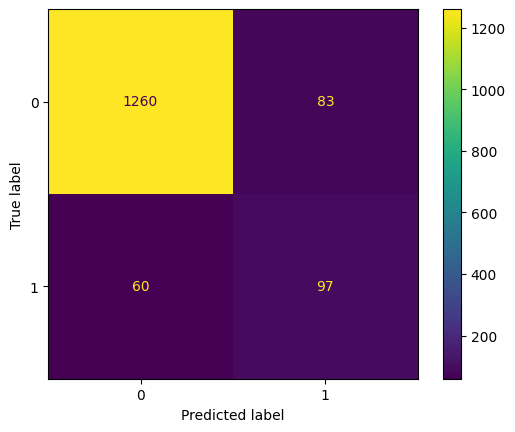

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model_3, X = x_test, y = y_test);

### Using Random Forest Classifier Model

In [25]:
np.random.seed(42)

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

#define model
model_4 =  RandomForestClassifier()

#Fit model
model_4.fit(x_train, y_train)

#Score model
# Make predictions on the test set
y_pred = model_4.predict(x_test)

# Score the model on the testing data
accuracy = model_4.score(x_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.99


In [26]:
y_pred = model_4.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[1342,    1],
       [  14,  143]], dtype=int64)

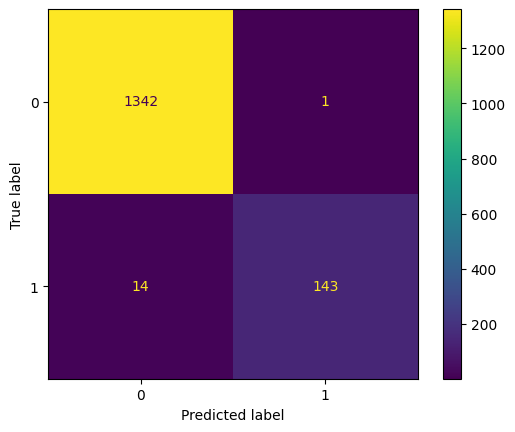

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model_4, X = x_test, y = y_test);

### Using Cross Validation for all the above models

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
np.random.seed(42)
scoring_single = model_1.score(x_test, y_test)

scoring_cross_vali = np.mean(cross_val_score(model_1, X, y, cv = 4))

scoring_single, scoring_cross_vali

(0.9013333333333333, 0.9076)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
 
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, solver='liblinear')
rf = RandomForestClassifier()
nv = GaussianNB()


models = {'KNN': knn, 'Logistic Regression': lr, 'Random Forest': rf, 'Naive Bayes': nv}

def cross_validate_models(models, X, y, cv=4, scoring='accuracy'):
    
    """
    Perform cross-validation on multiple models using the specified data and return the evaluation scores.
    """
    scores_dict = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        scores_dict[model_name] = scores
    return scores_dict

# Example usage:
# Assume you have already imported your dataset as X and y
# and you have initialized your models (e.g., knn = KNeighborsClassifier(), lr = LogisticRegression(), dt = DecisionTreeClassifier())
 
models = {'KNN': knn, 'Logistic Regression': lr, 'Random Forest': rf, 'Naive Bayes': nv}
scores_dict = cross_validate_models(models, X, y)
for model_name, scores in scores_dict.items():
    print(model_name, "Cross-validation scores:", scores)
    print(model_name, "Mean accuracy:", scores.mean())

KNN Cross-validation scores: [0.9008 0.9024 0.8928 0.9008]
KNN Mean accuracy: 0.8992
Logistic Regression Cross-validation scores: [0.9128 0.9072 0.9064 0.9056]
Logistic Regression Mean accuracy: 0.9079999999999999
Random Forest Cross-validation scores: [0.9856 0.9848 0.9864 0.9888]
Random Forest Mean accuracy: 0.9864
Naive Bayes Cross-validation scores: [0.8976 0.904  0.8984 0.9008]
Naive Bayes Mean accuracy: 0.9002000000000001


### Hyperparameter tuning

##### We are going to try and adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

#### On Logistic Regression

In [31]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'max_depth': [None, 5,10,20,30],
        'max_features': ['auto','sqrt'],
        'min_samples_leaf': [1,2,4],
        'min_samples_split': [2,4,6],
        'n_estimators': [10,100,200,500,1000,1200]}

In [32]:
# Shuffle data
df_shuffled = df.sample(frac = 1)

In [33]:
X = df_shuffled.drop(['ID', 'Personal Loan'], axis = 1)
y = df_shuffled['Personal Loan']

In [34]:
#Turn the Categeories into numbers
#One Hot Encoding is a process used to turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_features =["Family","Education"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder = "passthrough")
X = transformer.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [35]:
 grid_log ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

np.random.seed(42)

#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define model
model_1_1 = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
rs_model_1_1 = RandomizedSearchCV(estimator = model_1_1,
                           param_distributions = grid_log,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_model_1_1.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   2.7s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, 

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omoto\AppDat

In [36]:
rs_model_1_1.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [37]:
# To make prediction with the best hyperparameter
rs_model_1_1_y_preds = rs_model_1_1.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix

rs_model_1_1_y_preds = rs_model_1_1.predict(X_test)

confusion_matrix(y_test, rs_model_1_1_y_preds)

array([[1341,    9],
       [  43,  107]], dtype=int64)

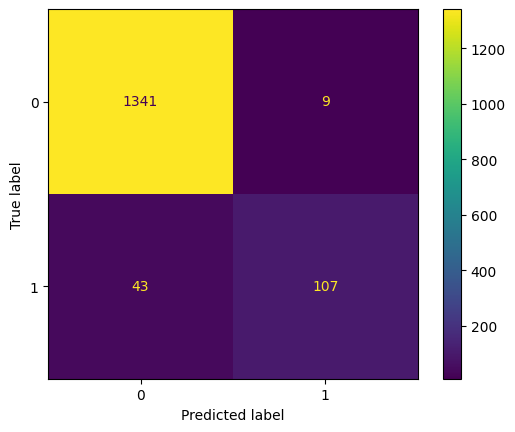

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = rs_model_1_1, X = X_test, y = y_test);

### On KNN model

In [41]:
grid_knn = {
    'n_neighbors': range(1, 21),  # try values from 1 to 20 for the number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # algorithm used to compute nearest neighbors
}

In [42]:
np.random.seed(42)

#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define model
model_2_1 = KNeighborsClassifier(n_jobs = -1)

# Setup RandomizedSearchCV
rs_model_2_1 = RandomizedSearchCV(estimator = model_2_1,
                           param_distributions = grid_knn,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_model_2_1.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighb

In [43]:
rs_model_2_1.best_params_

{'weights': 'distance', 'n_neighbors': 19, 'algorithm': 'ball_tree'}

In [44]:
# To make prediction with the best hyperparameter and show matrix

rs_model_2_1_y_preds = rs_model_2_1.predict(X_test)

confusion_matrix(y_test, rs_model_2_1_y_preds)

array([[1340,   10],
       [ 140,   10]], dtype=int64)

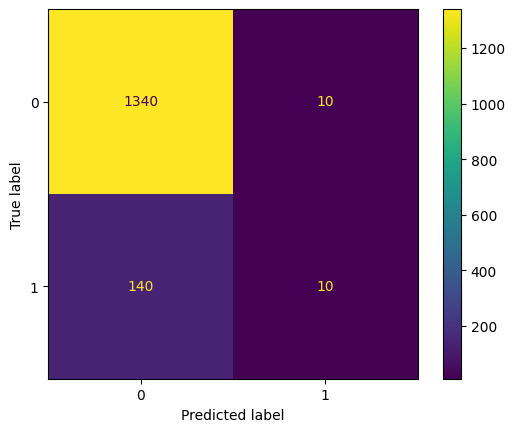

In [45]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_model_2_1, X = X_test, y = y_test);

In [57]:
from sklearn.model_selection import GridSearchCV

grid_knn = {
    'n_neighbors': range(1, 21),  # try values from 1 to 20 for the number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # algorithm used to compute nearest neighbors
}

In [58]:
np.random.seed(42)

#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define model
model_3_1 = KNeighborsClassifier(n_jobs = -1)

# Setup RandomizedSearchCV
gs_model_2_1 = GridSearchCV(estimator = model_3_1,
                           param_grid = grid_knn,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_model_2_1.fit(X_train, y_train);

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=2, w

In [59]:
gs_model_2_1.best_params_

{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}

In [60]:
# To make prediction with the best hyperparameter and show matrix

gs_model_2_1_y_preds = gs_model_2_1.predict(X_test)

confusion_matrix(y_test, gs_model_2_1_y_preds)

array([[1340,   10],
       [ 140,   10]], dtype=int64)

### on Naive Bayes Model

In [54]:
grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [56]:
np.random.seed(42)

#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define model
model_4_1 = GaussianNB()

# Setup RandomizedSearchCV
rs_model_4_1 = RandomizedSearchCV(estimator = model_4_1,
                           param_distributions = grid_nb,
                           n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
rs_model_4_1.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................var_smoothing=0.002848035868435802; total time=   0.0s
[CV] END .................var_smoothing=0.002848035868435802; total time=   0.0s
[CV] END .................var_smoothing=0.002848035868435802; total time=   0.0s
[CV] END .................var_smoothing=0.002848035868435802; total time=   0.0s
[CV] END .................var_smoothing=0.002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................................var_smo

In [61]:
rs_model_4_1.best_params_

{'var_smoothing': 0.0023101297000831605}

In [64]:
# To make prediction with the best hyperparameter and show a matrix

rs_model_4_1_y_preds = rs_model_4_1.predict(X_test)

confusion_matrix(y_test, rs_model_4_1_y_preds)

array([[1345,    5],
       [ 142,    8]], dtype=int64)

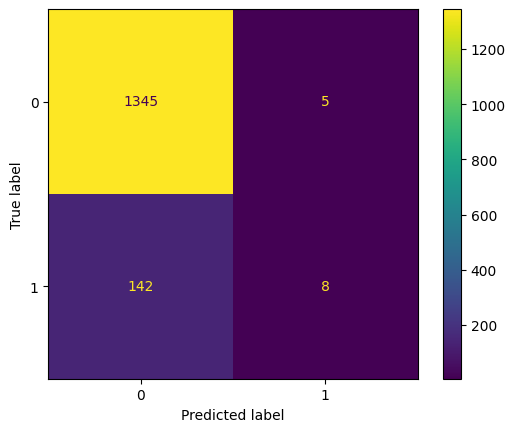

In [65]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_model_4_1, X = X_test, y = y_test);